In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [15]:
country = "benin"  
data_path = r"C:\Users\admin\solar-challenge-week0\data\benin-malanville.csv"

df = pd.read_csv(data_path)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [16]:

# Summary statistics
print(df.describe())

# Check for missing values
missing = df.isna().sum()
print(missing[missing>0])

# Percentage of missing values
print((df.isna().sum()/len(df))*100)

                           Timestamp            GHI            DNI  \
count                         514854  514854.000000  514854.000000   
mean   2022-02-07 00:38:57.731823104     233.725055     166.283925   
min              2021-08-09 00:01:00     -11.100000      -7.800000   
25%              2021-11-07 19:54:15      -2.000000      -0.500000   
50%              2022-02-06 02:03:30       0.200000      -0.200000   
75%              2022-05-09 18:54:45     460.300000     315.200000   
max              2022-08-09 00:00:00    1221.000000     952.300000   
std                              NaN     326.863616     262.046732   

                 DHI           ModA           ModB           Tamb  \
count  514854.000000  514854.000000  514854.000000  514854.000000   
mean      109.804084     229.940692     222.747296      28.126600   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.100000   
50%         0.100000    

In [17]:

high_nulls = (df.isna().mean() * 100)[(df.isna().mean() * 100) > 5]
print("Columns with >5% missing values:\n", high_nulls)


Columns with >5% missing values:
 Comments    100.0
dtype: float64


In [18]:

# Columns to check
numeric_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)

print(f"Outliers detected: {outliers.sum()} rows")

Outliers detected: 1808 rows


In [19]:

# Remove outliers
df_clean = df[~outliers].copy()

# Impute missing values (median)
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())

df_clean.to_csv(r"C:\Users\admin\solar-challenge-week0\data\benin-malanville_clean.csv", index=False)


c:\Users\admin\solar-challenge-week0\my_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


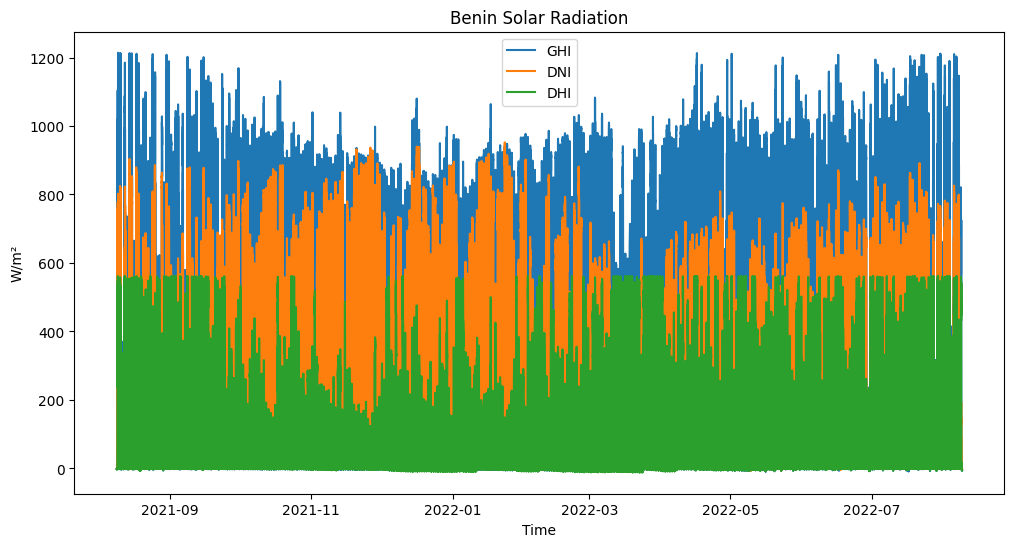

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], label='GHI')
plt.plot(df_clean['Timestamp'], df_clean['DNI'], label='DNI')
plt.plot(df_clean['Timestamp'], df_clean['DHI'], label='DHI')
plt.legend()
plt.title(f"{country.capitalize()} Solar Radiation")
plt.xlabel("Time")
plt.ylabel("W/m²")
plt.show()

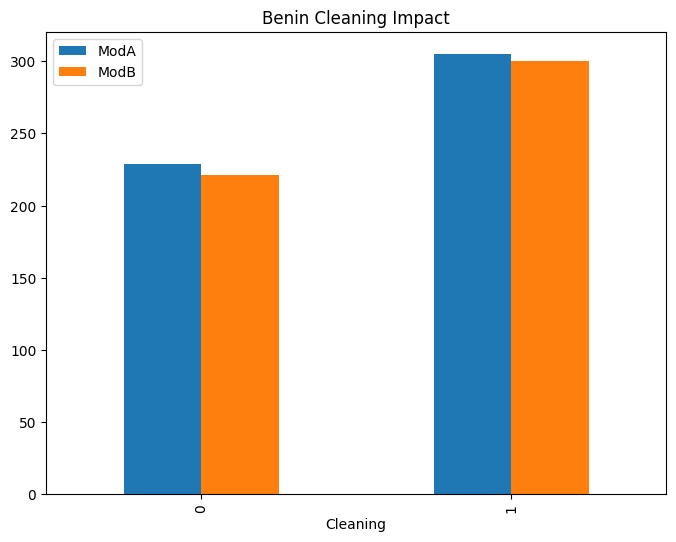

In [21]:
cleaning_effect = df_clean.groupby('Cleaning')[['ModA','ModB']].mean()
cleaning_effect.plot(kind='bar', figsize=(8,6))
plt.title(f"{country.capitalize()} Cleaning Impact")
plt.show()

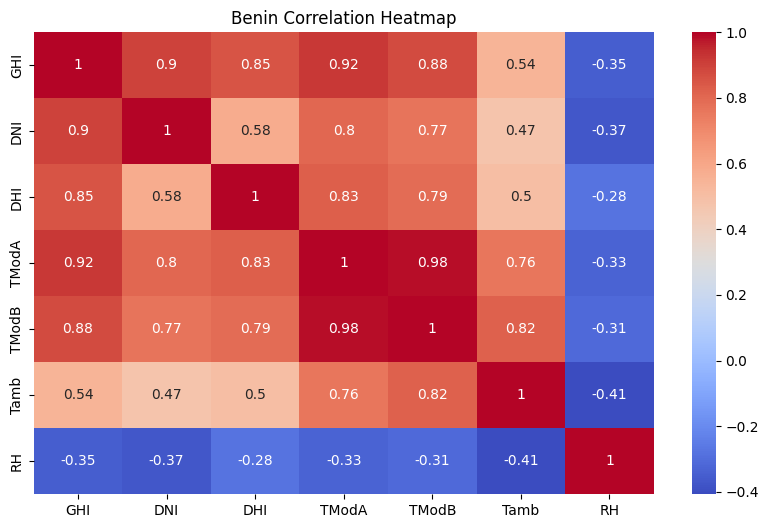

In [22]:

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_clean[['GHI','DNI','DHI','TModA','TModB','Tamb','RH']].corr(), annot=True, cmap='coolwarm')
plt.title(f"{country.capitalize()} Correlation Heatmap")
plt.show()

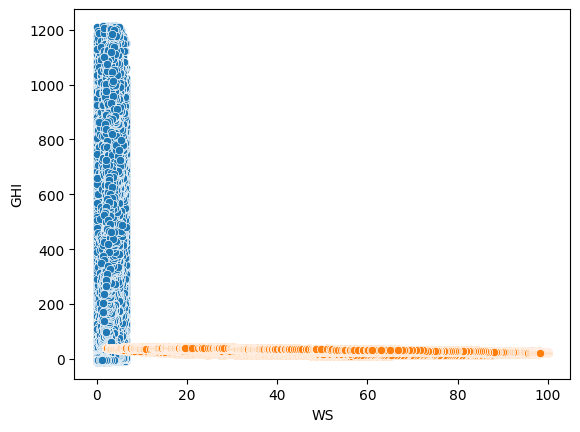

In [24]:
# Scatter plots
sns.scatterplot(data=df_clean, x='WS', y='GHI')
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.show()


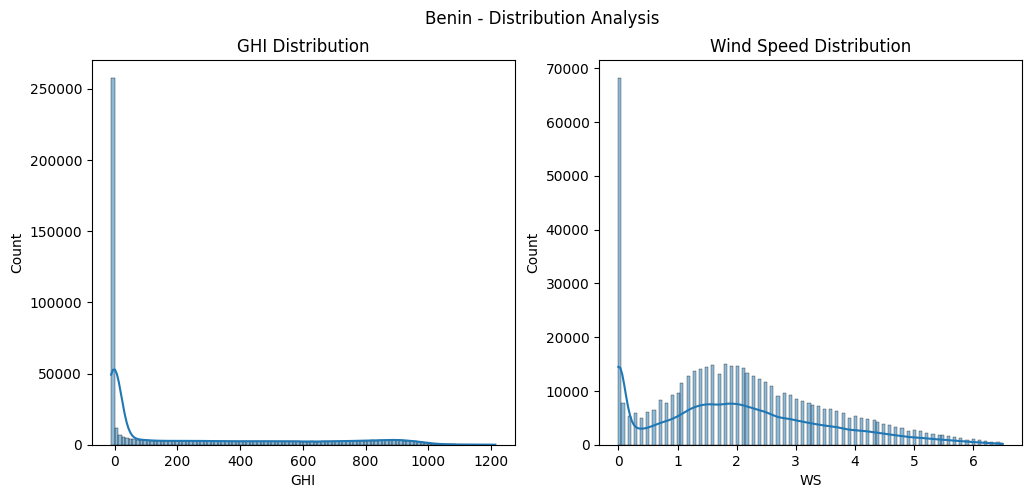

In [25]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df_clean['GHI'], kde=True, ax=ax[0])
ax[0].set_title("GHI Distribution")
sns.histplot(df_clean['WS'], kde=True, ax=ax[1])
ax[1].set_title("Wind Speed Distribution")
plt.suptitle(f"{country.capitalize()} - Distribution Analysis")
plt.show()

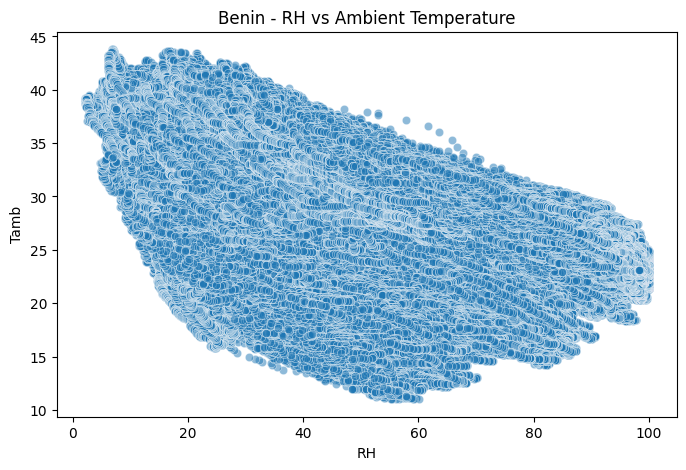

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.5)
plt.title(f"{country.capitalize()} - RH vs Ambient Temperature")
plt.show()

In [27]:

correlation = df_clean['RH'].corr(df_clean['Tamb'])
print(f"Correlation between RH and Tamb: {correlation:.3f}")


Correlation between RH and Tamb: -0.407


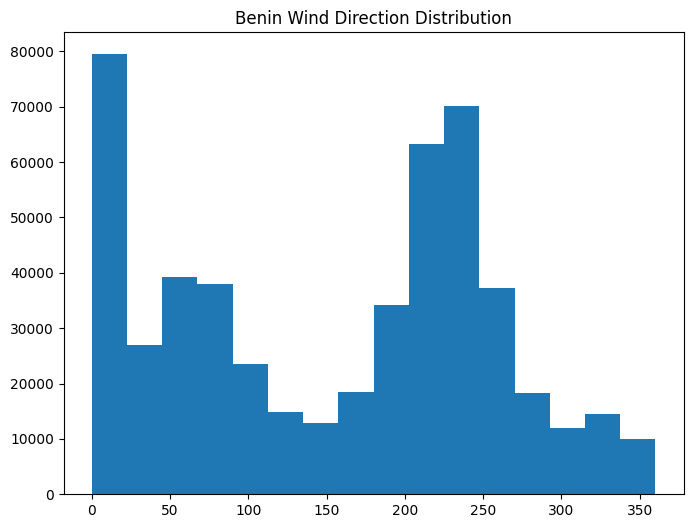

In [28]:

# Wind rose (simplified)
plt.figure(figsize=(8,6))
plt.hist(df_clean['WD'], bins=16)
plt.title(f"{country.capitalize()} Wind Direction Distribution")
plt.show()

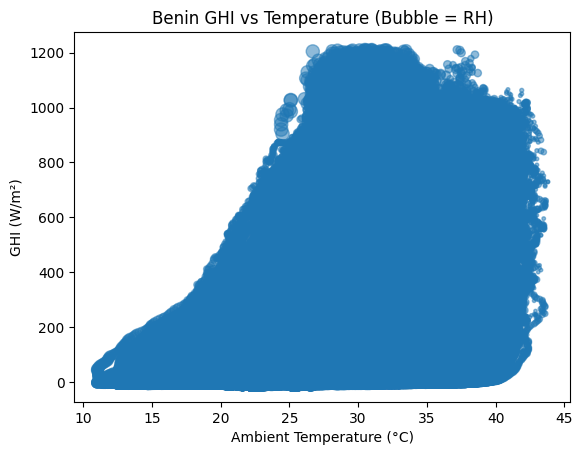

In [29]:
# Solar radiation vs. temperature
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH'], alpha=0.5)
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title(f"{country.capitalize()} GHI vs Temperature (Bubble = RH)")
plt.show()

In [30]:


from scipy.stats import skew, kurtosis
for col in ['GHI','DNI','DHI']:
    print(f"{col} - Skew: {skew(df_clean[col]):.2f}, Kurtosis: {kurtosis(df_clean[col]):.2f}")


GHI - Skew: 1.08, Kurtosis: -0.33
DNI - Skew: 1.30, Kurtosis: 0.18
DHI - Skew: 1.14, Kurtosis: 0.18






print(f"""
🔍 {country.capitalize()} Dataset Summary:
- Total Records: {len(df)}
- Cleaned Records: {len(df_clean)}
- Missing Values Fixed: {missing.sum()}
- Outliers Removed: {outliers.sum()}
- Correlation (RH vs Tamb): {correlation:.2f}

✅ Data ready for modeling and region comparison.
""")
